In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.io import output_file, show
from bokeh.plotting import figure
import datetime

In [2]:
def match(h,a,simType,actual_h_goals=0,actual_a_goals=0):
        
    teams = [
    'Liverpool','Man City','Leicester','Chelsea','Man Utd',
    'Wolves','Arsenal','Sheffield Utd','Burnley','Spurs',
    'Everton','Newcastle','Southampton','Crystal Palace','Brighton',
    'West Ham','Watford','Aston Villa','Bournemouth','Norwich']
    GF = [
    75,86,64,63,59,
    45,50,35,38,52,
    41,35,43,30,36,
    40,31,36,32,26
    ] 
    GA = [
    26,34,32,46,33,
    37,42,33,46,44,
    49,50,56,43,47,
    59,53,65,59,63
    ]   
    
    avgGoals = pd.DataFrame({'teams':teams,'GF':GF,'GA':GA})
    avgGoals['AvgGF'] =  avgGoals['GF'] / 34
    avgGoals['AvgGA'] =  avgGoals['GA'] / 34    
    
    h_lam = float(avgGoals[avgGoals['teams']==h]['AvgGF']) * .5  + float(avgGoals[avgGoals['teams']==a]['AvgGA']) * .5
    a_lam = float(avgGoals[avgGoals['teams']==a]['AvgGF']) * .5  + float(avgGoals[avgGoals['teams']==h]['AvgGA']) * .5
    
    if simType == 'Complete':
        
        h_goals = actual_h_goals
        a_goals = actual_a_goals
        
    else:
    
        h_goals = np.random.poisson(h_lam)
        a_goals = np.random.poisson(a_lam)
    
    
#Match Points allocation
    if h_goals == a_goals:
        h_pts = 1
        a_pts = 1
    elif h_goals > a_goals:
        h_pts = 3
        a_pts = 0
    else:
        h_pts = 0
        a_pts = 3
        
    h_gd = h_goals - a_goals
    a_gd = a_goals - h_goals
        
    match = pd.DataFrame({'Team':[h,a],
                         'Goals':[h_goals,a_goals],
                         'Goal Diff':[h_gd,a_gd],
                         'pts':[h_pts,a_pts]})
    
    return match

In [3]:
def matches(simType):

    MW = pd.DataFrame(columns=['Team', 'Goals', 'Goal Diff','pts'])

    df = match('Spurs','Everton','Complete',1,0)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Crystal Palace','Chelsea','Complete',2,3)
    MW = MW.append(df,ignore_index=True)

    df = match('Watford','Norwich','Complete',2,1)
    MW = MW.append(df,ignore_index=True)

    df = match('Arsenal','Leicester','Complete',1,1)
    MW = MW.append(df,ignore_index=True)

    df = match('Man City','Newcastle','Complete',5,0)
    MW = MW.append(df,ignore_index=True)

    df = match('Sheffield Utd','Wolves','Complete',1,0)
    MW = MW.append(df,ignore_index=True)

    df = match('West Ham','Burnley','Complete',0,1)
    MW = MW.append(df,ignore_index=True)

    df = match('Brighton','Liverpool','Complete',1,3)
    MW = MW.append(df,ignore_index=True)

    df = match('Bournemouth','Spurs','Complete',0,0)
    MW = MW.append(df,ignore_index=True)

    df = match('Everton','Southampton','Complete',1,1)
    MW = MW.append(df,ignore_index=True)

    df = match('Aston Villa','Man Utd','Complete',0,3)
    MW = MW.append(df,ignore_index=True)

    df = match('Norwich','West Ham',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Watford','Newcastle',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Liverpool','Burnley',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Sheffield Utd','Chelsea',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Brighton','Man City',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Wolves','Everton',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Aston Villa','Crystal Palace',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Bournemouth','Leicester',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Man Utd','Southampton',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Chelsea','Norwich',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Burnley','Wolves',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Man City','Bournemouth',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Newcastle','Spurs',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Arsenal','Liverpool',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Everton','Aston Villa',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Leicester','Sheffield Utd',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Crystal Palace','Man Utd',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Southampton','Brighton',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Chelsea','Norwich',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('West Ham','Watford',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Norwich','Burnley',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Bournemouth','Southampton',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Spurs','Leicester',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Brighton','Newcastle',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Sheffield Utd','Everton',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Wolves','Crystal Palace',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Watford','Man City',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Aston Villa','Arsenal',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Man Utd','West Ham',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Liverpool','Chelsea',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Arsenal','Watford',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Burnley','Brighton',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Chelsea','Wolves',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Crystal Palace','Spurs',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Everton','Bournemouth',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Leicester','Man Utd',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Man City','Norwich',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Newcastle','Liverpool',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Southampton','Sheffield Utd',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('West Ham','Aston Villa',simType)
    MW = MW.append(df,ignore_index=True)
    
    return MW

In [4]:
def FinalTable(MW):
    FinalTable = pd.DataFrame({
        'Team':['Liverpool',
            'Man City',
            'Leicester',
            'Chelsea',
            'Man Utd',
            'Wolves',
            'Arsenal',
            'Sheffield Utd',
            'Burnley',
            'Spurs',
            'Everton',
            'Newcastle',
            'Crystal Palace',
            'Southampton',
            'Brighton',
            'West Ham',
            'Watford',
            'Aston Villa',
            'Bournemouth',
            'Norwich'],
        'Goal Differnce':[
            MW[MW['Team']=='Liverpool']['Goal Diff'].sum(),
            MW[MW['Team']=='Man City']['Goal Diff'].sum(),
            MW[MW['Team']=='Leicester']['Goal Diff'].sum(),
            MW[MW['Team']=='Chelsea']['Goal Diff'].sum(),
            MW[MW['Team']=='Man Utd']['Goal Diff'].sum(),
            MW[MW['Team']=='Wolves']['Goal Diff'].sum(),
            MW[MW['Team']=='Arsenal']['Goal Diff'].sum(),
            MW[MW['Team']=='Sheffield Utd']['Goal Diff'].sum(),
            MW[MW['Team']=='Burnley']['Goal Diff'].sum(),
            MW[MW['Team']=='Spurs']['Goal Diff'].sum(),
            MW[MW['Team']=='Everton']['Goal Diff'].sum(),
            MW[MW['Team']=='Newcastle']['Goal Diff'].sum(),
            MW[MW['Team']=='Crystal Palace']['Goal Diff'].sum(),
            MW[MW['Team']=='Southampton']['Goal Diff'].sum(),
            MW[MW['Team']=='Brighton']['Goal Diff'].sum(),
            MW[MW['Team']=='West Ham']['Goal Diff'].sum(),
            MW[MW['Team']=='Watford']['Goal Diff'].sum(),
            MW[MW['Team']=='Aston Villa']['Goal Diff'].sum(),
            MW[MW['Team']=='Bournemouth']['Goal Diff'].sum(),
            MW[MW['Team']=='Norwich']['Goal Diff'].sum()             
        ],
        'Points':[
            MW[MW['Team']=='Liverpool']['pts'].sum(),
            MW[MW['Team']=='Man City']['pts'].sum(),
            MW[MW['Team']=='Leicester']['pts'].sum(),
            MW[MW['Team']=='Chelsea']['pts'].sum(),
            MW[MW['Team']=='Man Utd']['pts'].sum(),
            MW[MW['Team']=='Wolves']['pts'].sum(),
            MW[MW['Team']=='Arsenal']['pts'].sum(),
            MW[MW['Team']=='Sheffield Utd']['pts'].sum(),
            MW[MW['Team']=='Burnley']['pts'].sum(),
            MW[MW['Team']=='Spurs']['pts'].sum(),
            MW[MW['Team']=='Everton']['pts'].sum(),
            MW[MW['Team']=='Newcastle']['pts'].sum(),
            MW[MW['Team']=='Crystal Palace']['pts'].sum(),
            MW[MW['Team']=='Southampton']['pts'].sum(),
            MW[MW['Team']=='Brighton']['pts'].sum(),
            MW[MW['Team']=='West Ham']['pts'].sum(),
            MW[MW['Team']=='Watford']['pts'].sum(),
            MW[MW['Team']=='Aston Villa']['pts'].sum(),
            MW[MW['Team']=='Bournemouth']['pts'].sum(),
            MW[MW['Team']=='Norwich']['pts'].sum()             
        ]

    })
    
    FinalTable = FinalTable.sort_values(by=['Points', 'Goal Differnce'], ascending=False)
    FinalTable['Pos'] = np.arange(len(FinalTable)) + 1
    FinalTable['CL'] = FinalTable['Pos'].apply(lambda x: 1 if x < 5 else 0) 
    FinalTable['CL_MC_Ban'] = FinalTable['Pos'].apply(lambda x: 1 if x < 6 else 0) 
    FinalTable['CL_MC_Ban']['Man City'] = 0
    return FinalTable

In [5]:
simType = 'Random' 

In [8]:
teams = [
    'Liverpool','Man City','Leicester','Chelsea','Man Utd',
    'Wolves','Arsenal','Sheffield Utd','Burnley','Spurs',
    'Everton','Newcastle','Crystal Palace','Southampton','Brighton',
    'West Ham','Watford','Aston Villa','Bournemouth','Norwich']
GoalDiff = [
    47,47,32,16,23,
    9,8,1,-9,7,
    -7,-10,-12,-14,-9,
    -18,-23,-26,-27,-36
] 
pts = [
    89,66,58,57,55,52,49,48,46,45,44,43,42,43,36,31,28,27,27,21   
]

table = pd.DataFrame({'Team':teams,'Goals':np.full(20,0),'Goal Diff':GoalDiff,'pts':pts})


In [17]:
numSim = 1000
start = datetime.datetime.now()

LeagueSim = pd.DataFrame(columns=['Team', 'Goal Differnce', 'Points','CL'])
p = 1

for x in range(1,numSim+1):
    MW = matches(simType)

    MW = MW.append(table,ignore_index=True)

    df = FinalTable(MW)

    LeagueSim = LeagueSim.append(df,ignore_index=True)
    
    pn = round(numSim+1 / 10,0)
    
    if x == (p*pn):
        
        print(str(round(p/10,2)*100)+'% done')
              
        p = p + 1
        
    elif x == 100: 
        
        end = datetime.datetime.now() 
        
        time = end - start
        
        remainingTime = (((numSim / 100) * time) - time) / 60
        
        print('100 done so far, minutes remaining:',remainingTime)

C:\Users\andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


100 done so far, minutes remaining: 0:00:08.323243
10.0% done


In [18]:
print(
'Leicester',str(round(LeagueSim[LeagueSim['Team']=='Leicester']['CL'].mean(),2)*100)+'%,',
 str(round(LeagueSim[LeagueSim['Team']=='Leicester']['CL_MC_Ban'].mean(),2)*100)+'% w/ city ban'
'\nChelsea',str(round(LeagueSim[LeagueSim['Team']=='Chelsea']['CL'].mean(),2)*100)+'%,',
 str(round(LeagueSim[LeagueSim['Team']=='Chelsea']['CL_MC_Ban'].mean(),2)*100)+'% w/ city ban'
'\nMan Utd',str(round(LeagueSim[LeagueSim['Team']=='Man Utd']['CL'].mean(),2)*100)+'%,',
 str(round(LeagueSim[LeagueSim['Team']=='Man Utd']['CL_MC_Ban'].mean(),2)*100)+'% w/ city ban'
'\nWolves',str(round(LeagueSim[LeagueSim['Team']=='Wolves']['CL'].mean(),2)*100)+'%,',
 str(round(LeagueSim[LeagueSim['Team']=='Wolves']['CL_MC_Ban'].mean(),2)*100)+'% w/ city ban'
'\nSheffield Utd',str(round(LeagueSim[LeagueSim['Team']=='Sheffield Utd']['CL'].mean(),2)*100)+'%,',
 str(round(LeagueSim[LeagueSim['Team']=='Sheffield Utd']['CL_MC_Ban'].mean(),2)*100)+'% w/ city ban'
'\nArsenal',str(round(LeagueSim[LeagueSim['Team']=='Arsenal']['CL'].mean(),2)*100)+'%,',
 str(round(LeagueSim[LeagueSim['Team']=='Arsenal']['CL_MC_Ban'].mean(),2)*100)+'% w/ city ban'
'\nSpurs',str(round(LeagueSim[LeagueSim['Team']=='Spurs']['CL'].mean(),2)*100)+'%,',
 str(round(LeagueSim[LeagueSim['Team']=='Spurs']['CL_MC_Ban'].mean(),2)*100)+'% w/ city ban'
)

Leicester 68.0%, 99.0% w/ city ban
Chelsea 88.0%, 99.0% w/ city ban
Man Utd 44.0%, 97.0% w/ city ban
Wolves 0.0%, 3.0% w/ city ban
Sheffield Utd 0.0%, 1.0% w/ city ban
Arsenal 0.0%, 0.0% w/ city ban
Spurs 0.0%, 0.0% w/ city ban


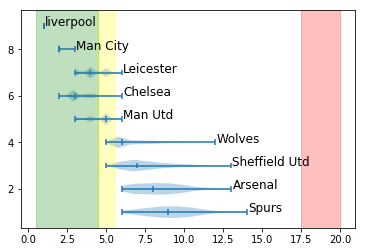

In [19]:
plt.violinplot(dataset = [LeagueSim[LeagueSim.Team == 'Spurs']["Pos"].values,
                           LeagueSim[LeagueSim.Team == 'Arsenal']["Pos"].values,
                         LeagueSim[LeagueSim.Team == 'Sheffield Utd']["Pos"].values,
                          LeagueSim[LeagueSim.Team == 'Wolves']["Pos"].values,
                          LeagueSim[LeagueSim.Team == 'Man Utd']["Pos"].values,
                          LeagueSim[LeagueSim.Team == 'Chelsea']["Pos"].values,
                          LeagueSim[LeagueSim.Team == 'Leicester']["Pos"].values,
                          LeagueSim[LeagueSim.Team == 'Man City']["Pos"].values,
                          LeagueSim[LeagueSim.Team == 'Liverpool']["Pos"].values] ,
                   showmeans=False,
                   showmedians=True,
                   vert=False,
                   points=10
              )




plt.text(LeagueSim[LeagueSim.Team == 'Spurs']["Pos"].max()+.1, 1, r'Spurs', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Arsenal']["Pos"].max()+.1, 2, r'Arsenal', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Sheffield Utd']["Pos"].max()+.1, 3, r'Sheffield Utd', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Wolves']["Pos"].max()+.1, 4, r'Wolves', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Man Utd']["Pos"].max()+.1, 5, r'Man Utd', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Chelsea']["Pos"].max()+.1, 6, r'Chelsea', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Leicester']["Pos"].max()+.1, 7, r'Leicester', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Man City']["Pos"].max()+.1, 8, r'Man City', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Liverpool']["Pos"].max()+.1, 9, r'liverpool', fontsize=12)

plt.axvspan(.5, 4.5, color='green', alpha=0.25)
plt.axvspan(4.5, 5.5, color='yellow', alpha=0.25)
plt.axvspan(17.5, 20, color='red', alpha=0.25)

plt.show()

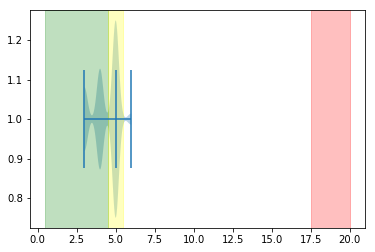

In [20]:
plt.violinplot(LeagueSim[LeagueSim.Team == 'Man Utd']["Pos"].values,
                    showmeans=False,
                   showmedians=True,
                   vert=False)


plt.axvspan(.5, 4.5, color='green', alpha=0.25)
plt.axvspan(4.5, 5.5, color='yellow', alpha=0.25)
plt.axvspan(17.5, 20, color='red', alpha=0.25)



plt.show()

In [21]:
len(LeagueSim)/20

1000.0

In [22]:
team = 'Arsenal'
print(str(team) + ' CL')
print('max pos:',LeagueSim[LeagueSim['Team']==team]['Pos'].min())
print('times making CL:',LeagueSim[LeagueSim['Team']==team]['CL'].sum(),',',
      str((LeagueSim[LeagueSim['Team']==team]['CL'].sum() / 10000)*100)  + '%')
print('CL with ban:',LeagueSim[LeagueSim['Team']==team]['CL_MC_Ban'].sum(),',',
     str((LeagueSim[LeagueSim['Team']==team]['CL_MC_Ban'].sum() / 10000)*100)  + '%')

Arsenal CL
max pos: 6.0
times making CL: 0 , 0.0%
CL with ban: 0.0 , 0.0%


In [26]:
transforrmed = pd.DataFrame({'Pos':np.array(range(1,21))})

#for team in teams:
for team in LeagueSim['Team']

    pos_list = []

    for pos in range(1,21):

        pos_list.append(LeagueSim[(LeagueSim['Team'] == team) & (LeagueSim['Pos'] == pos )]['Team'].count())

        tmp_trs = pd.DataFrame({team:pos_list})

    transforrmed = pd.concat([transforrmed, tmp_trs], axis=1)

#transforrmed

SyntaxError: invalid syntax (<ipython-input-26-d0adc0fdfddd>, line 4)

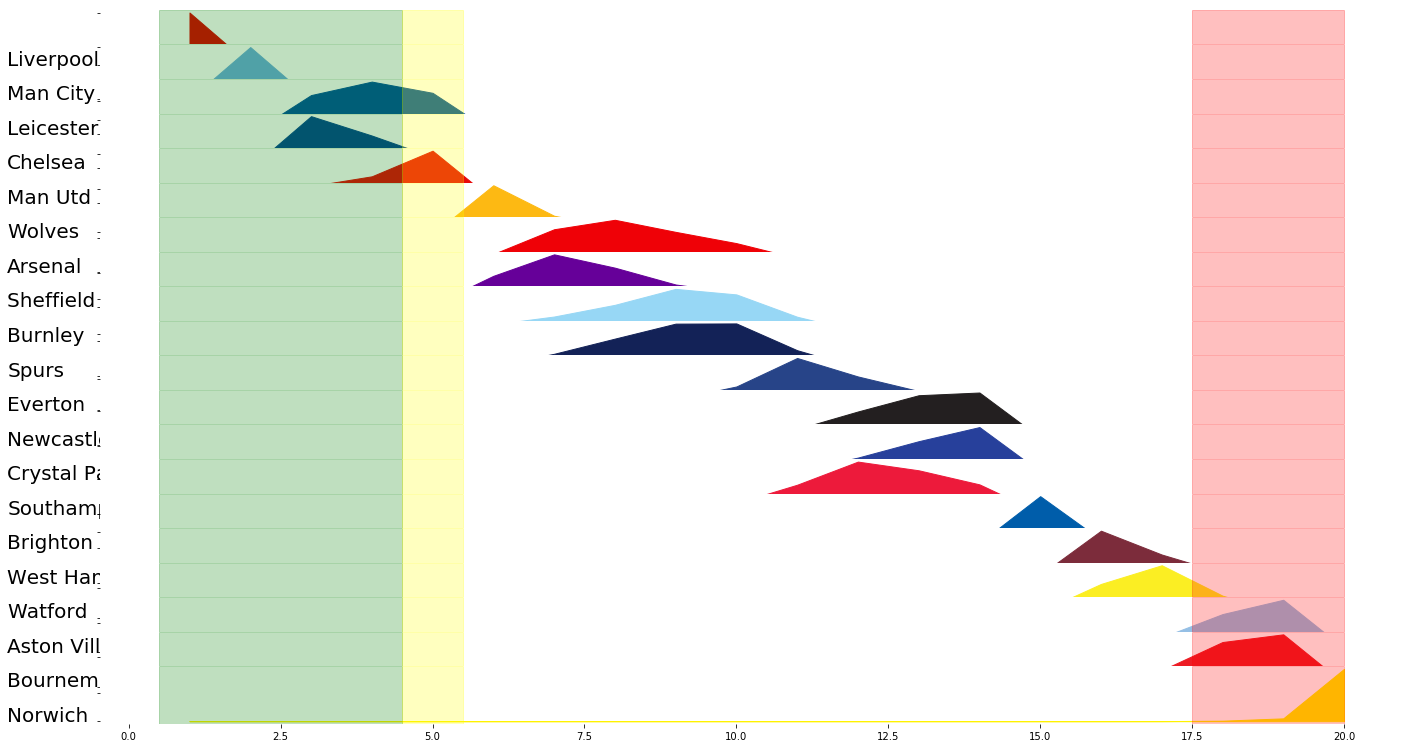

In [27]:
import matplotlib.gridspec as grid_spec

colors = ['#dd0000', '#6caddf', '#0053a0', '#034694', '#e80909', 
          '#fdb913', '#ef0107', '#660099', '#97d7f5', '#132257', #sheffield left
          '#274488', '#231f20', '#27409b', '#ed1a3b', '#005daa', 
          '#7c2c3b', '#fbee23', '#95BFE5', '#ed1c24', '#FFF200']

gs = (grid_spec.GridSpec(20,1))



i = 0


fig, axs = plt.subplots(20, 1, sharex=True)

for team in teams:
       
    #axs[i].plot(transforrmed['Pos'],transforrmed[team])
    axs[i].fill_between(transforrmed['Pos'],transforrmed[team],color=colors[i])
    
    #axs[i].axis("off")
    
    axs[i].spines["top"].set_visible(False)
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["bottom"].set_visible(False)
    axs[i].spines["left"].set_visible(False)
    axs[i].set_yticklabels([],color='white')
    
    #h = axs[i].set_ylabel(team)
    
    #h.set_rotation(0)
    
    axs[i].axvspan(.5, 4.5, color='green', alpha=0.25)
    axs[i].axvspan(4.5, 5.5, color='yellow', alpha=0.25)
    axs[i].axvspan(17.5, 20, color='red', alpha=0.25)
    axs[i].text(-2, 0, str(team), fontsize=20)
    
    i += 1
    


fig.set_size_inches(18.5, 10.5, forward=True)
gs.update(hspace= -0.5)

#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tight_layout(h_pad=-3.0)
plt.show()